In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv("../data/02_intermediate/df1.csv", index_col="Unnamed: 0")
dfk = pd.read_csv("../data/02_intermediate/dfk.csv", index_col="Unnamed: 0")

### fonctions pour faciliter la manipulation des données

In [310]:
# Return the mean of salary with paremeters 
def get_mean_salary(param, df=df1):
    return round(df.groupby(param)["SalaryUSD"].mean(),2)

# Function for creating barplot
def make_barplot(title, series, size=(10,6)):
    plt.figure(figsize=size)
    plt.title(title)
    return sns.barplot(x=series.index, y=series.values)

# Function for formatting salary on "xK $"
def to_k_usd(x):
    return str(int((x / 1000))) + "K $"

In [311]:
df1.head()

,SalaryUSD,PostalCode,Gender,EmploymentStatus,JobTitle,YearsWithThisTypeOfJob,HowManyCompanies,OtherPeopleOnYourTeam
0,115000.0,03,Male,Full time employee,Database Admin,5,1,2
1,100000.0,NaN,Male,Full time employee,Developer,6,1,More than 5
3,70000.0,94133,Male,Full time employee,Analyst,3,1,2
4,110000.0,95354,Male,Full time employee,Database Admin,25,3,None
5,79500.0,78727,Male,Full time employee,Analyst,2,1,None


In [312]:
dfk.head()

,Job Title,SalaryUSD,Location,State
0,"Data Analyst, Center on Immigration and Justic...",51500.0,"New York, NY",NY
1,Quality Data Analyst,51500.0,"New York, NY",NY
2,Senior Data Analyst,51500.0,"New York, NY",NY
3,Data Analyst,51500.0,"New York, NY",NY
4,Reporting Data Analyst,51500.0,"New York, NY",NY


### Calcul de la moyenne (salary_mean) et de la mediane (salary_med) base 1


In [315]:
salary_mean = df1["SalaryUSD"].mean()
salary_med = df1["SalaryUSD"].median()
print("Le salaire annuel moyen aux USA est de {} et le salaire médian est de {}".format(to_k_usd(salary_mean), to_k_usd(salary_med)))

Le salaire annuel moyen des Data Analysts est de 72K $ et le salaire médian est de 69K $


## Déciles base 1 


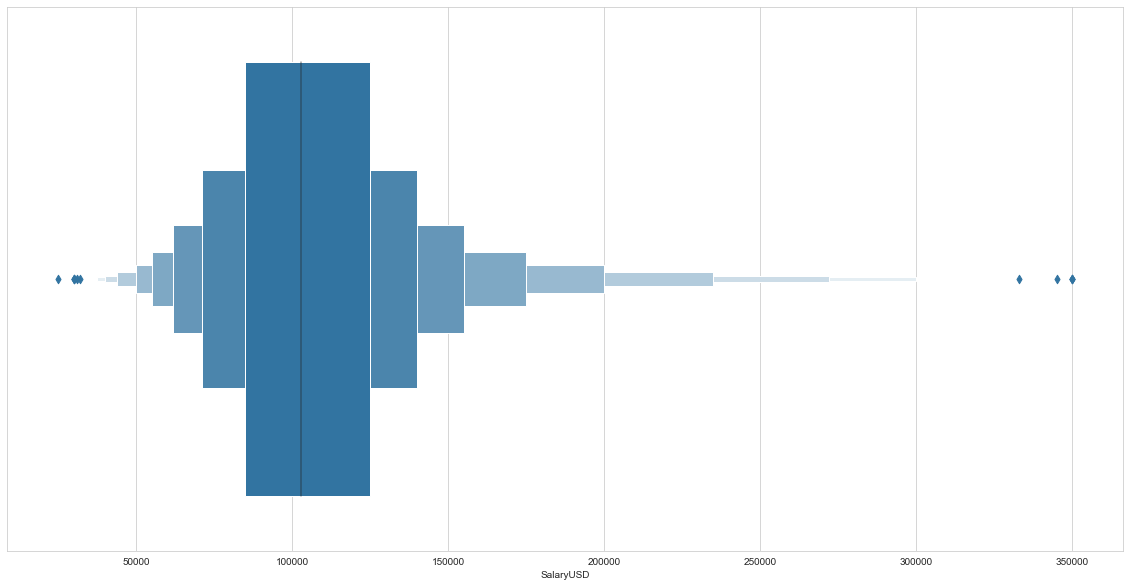

In [314]:
plt.figure(figsize = (20,10))
sns.boxenplot(x = df1["SalaryUSD"], k_depth="proportion")

### Calcul de la moyenne (salary_mean) et de la mediane (salary_med) base 2


In [313]:
salary_k_mean = dfk["SalaryUSD"].mean()
salary_k_med = dfk["SalaryUSD"].median()
print("Le salaire annuel moyen des Data Analysts est de {} et le salaire médian est de {}".format(to_k_usd(salary_k_mean), to_k_usd(salary_k_med)))

Le salaire annuel moyen aux USA est de 106K $ et le salaire médian est de 103K $


## Déciles base 2

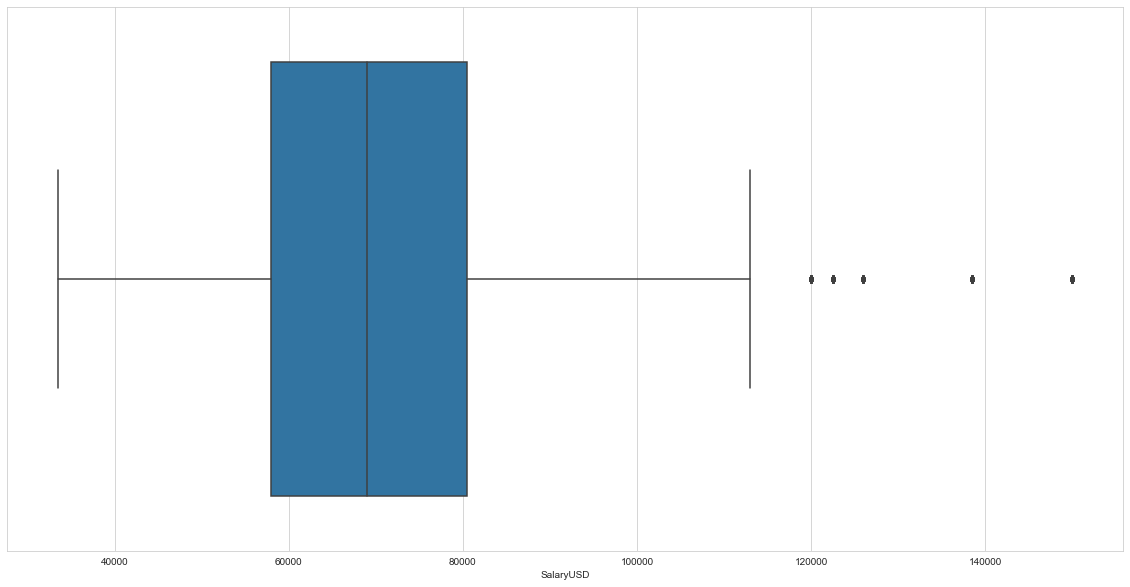

In [316]:
plt.figure(figsize = (20,10))
sns.boxplot(x = dfk["SalaryUSD"])

## Salaire moyen en fonction du job title


In [317]:
by_job = get_mean_salary("JobTitle")
by_job.apply(to_k_usd)


JobTitle
Analyst            79K $
Architect         136K $
Data Scientist    122K $
Database Admin    104K $
Developer          99K $
Engineer          110K $
Manager           124K $
Other              99K $
Name: SalaryUSD, dtype: object

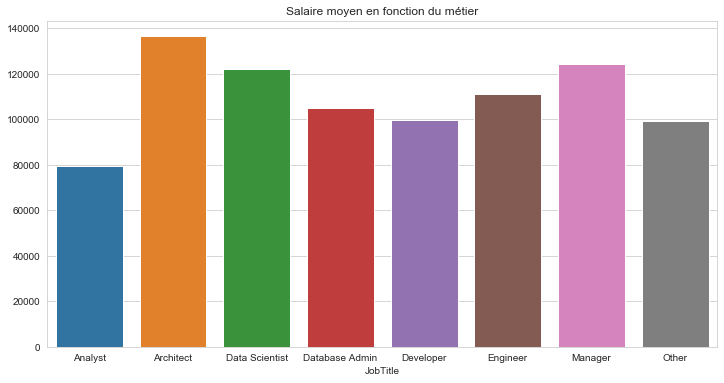

In [318]:
title = "Salaire moyen en fonction du métier"
make_barplot(title, by_job, (12,6))

## Diagramme circulaire de la répartitions de ses jobtitles

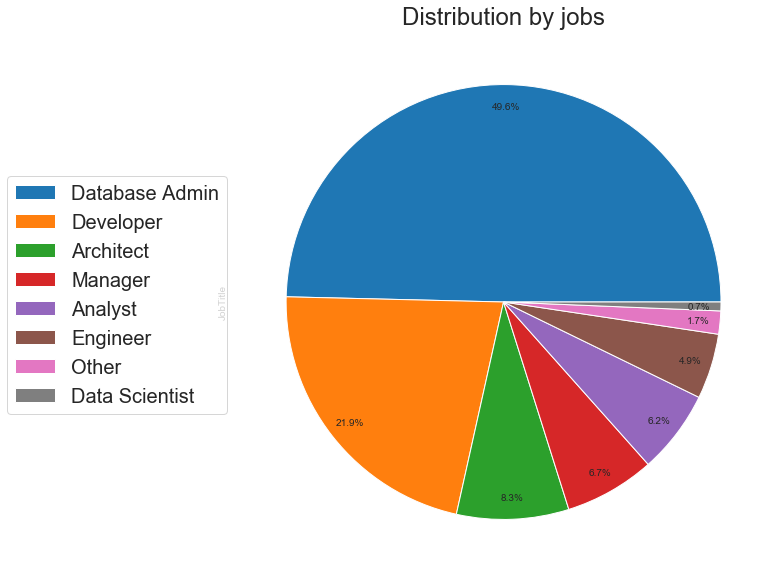

In [319]:
labels = df1["JobTitle"].value_counts().index
values = df1["JobTitle"].value_counts()
#fig, ax = plt.subplots()
values.plot.pie(autopct="%1.1f%%", pctdistance=0.9, figsize=(10,10), labels=None)
plt.title("Distribution by jobs", fontsize=24)
plt.legend(labels, bbox_to_anchor=(0.01, 0.75),
           fontsize=20)

## Est-il préférable de travailler pour une seule ou plusieurs compagnies?



In [320]:
by_many_cie = get_mean_salary("HowManyCompanies")
by_many_cie.apply(to_k_usd)

HowManyCompanies
1             97K $
2            107K $
3            117K $
4            119K $
5            124K $
6 or more    138K $
Not Asked    105K $
Name: SalaryUSD, dtype: object

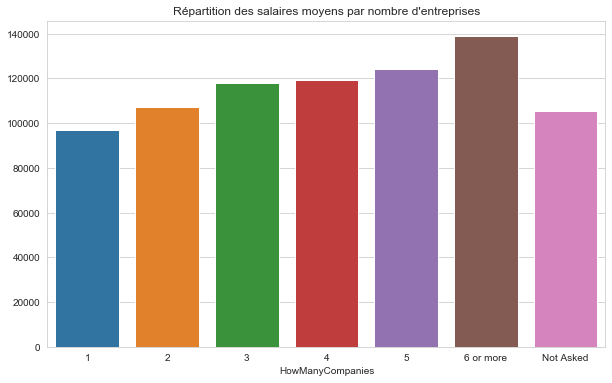

In [321]:
title = "Répartition des salaires moyens par nombre d'entreprises"
make_barplot(title, by_many_cie)

Le graphique montre que les personnes qui ont fait le plus d'entreprises différentes tendent à avoir des salaires plus élevés

## Le nombre de personne dans son équipe a-t-il une influence sur votre salaire?



In [322]:
by_team_size = get_mean_salary("OtherPeopleOnYourTeam")
by_team_size.apply(to_k_usd)

OtherPeopleOnYourTeam
1              105K $
2              102K $
3              106K $
4              103K $
5              105K $
More than 5    108K $
None           108K $
Name: SalaryUSD, dtype: object

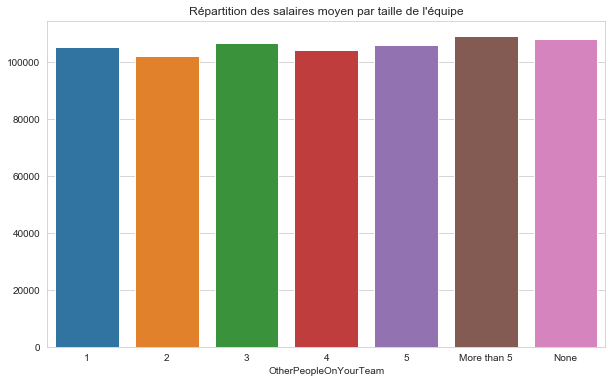

In [323]:
title = "Répartition des salaires moyen par taille de l'équipe"
make_barplot(title, by_team_size)

Le graphique montre que la taille de l'équipe n'a pas d'incidence sur le salaire moyen

## Le nombre d'année d'expérience dans ce type d'emploi a t il une influence sur votre salaire?

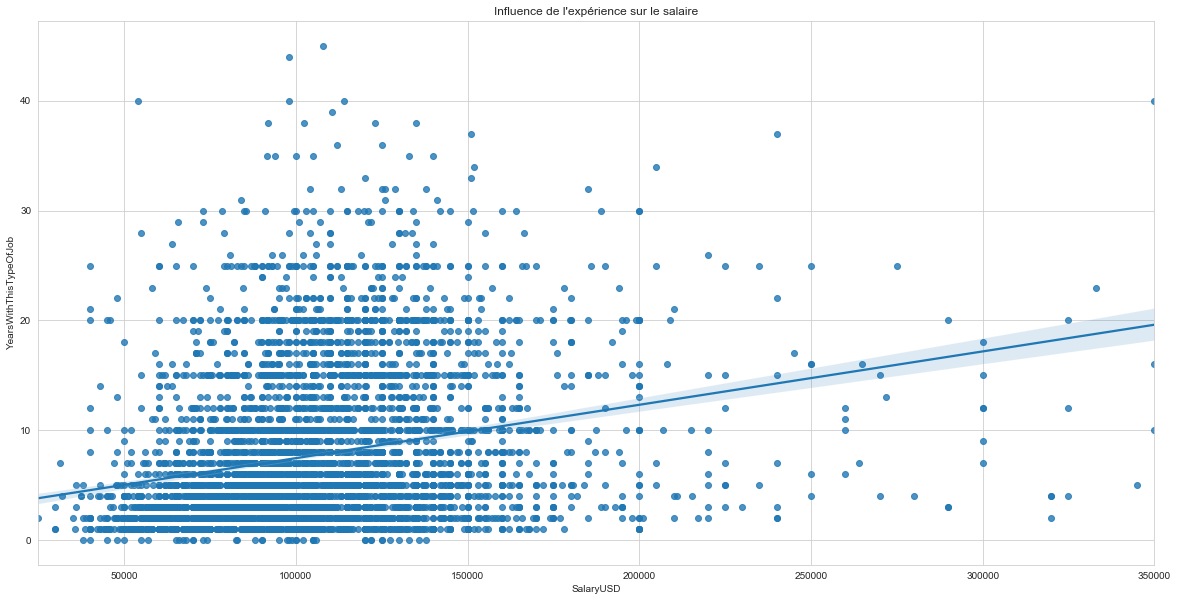

In [324]:
plt.figure(figsize=(20,10))
title = "Influence de l'expérience sur le salaire"
plt.title(title)
sns.regplot(y=df1.YearsWithThisTypeOfJob, x=df1.SalaryUSD)
sns.set_style('whitegrid')

In [325]:
Le graphique montre que le salaire tend à être plus élévé en fonction de l'expérience

SyntaxError: invalid syntax (<ipython-input-325-89abd38b92bc>, line 1)

## Il y-a-t-il une inégalité salariale entre les hommes et les femmes dans les emplois liées à la data aux Etats Unis?

In [295]:
g_df = df1[["Gender", "SalaryUSD", "JobTitle", "YearsWithThisTypeOfJob"]]
g_df = g_df[g_df.Gender != "Other - NA"]
by_gender = get_mean_salary("Gender", g_df)
by_gender.apply(to_k_usd)

Gender
Female    101K $
Male      107K $
Name: SalaryUSD, dtype: object

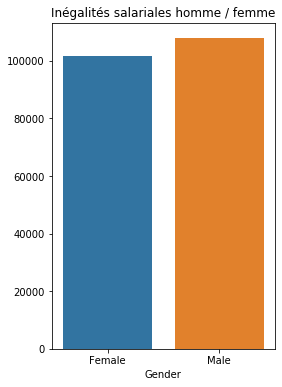

In [296]:
title = "Inégalités salariales homme / femme"
make_barplot(title, by_gender, (4, 6))

## Si cette inégalité salariale existe (suspense), est-elle due au fait que les femmes soient moins bien représentées dans les jobs les mieux payés ou que pour un travail identique elles sont en moyenne moins bien payées?

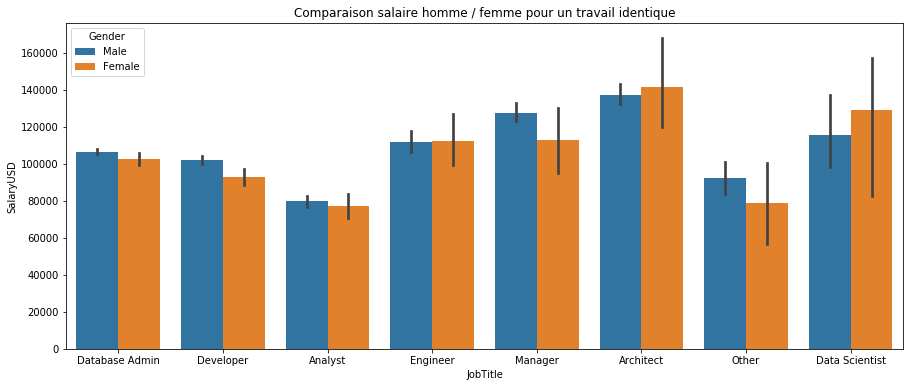

In [297]:
plt.figure(figsize=(15, 6))
plt.title("Comparaison salaire homme / femme pour un travail identique")
sns.barplot(x=g_df.JobTitle, y=g_df.SalaryUSD, hue=g_df.Gender)

## Y a t il une différence entre l'évolution salariale liées à l'expérience dans un même emploi entre les hommes et les femmes?

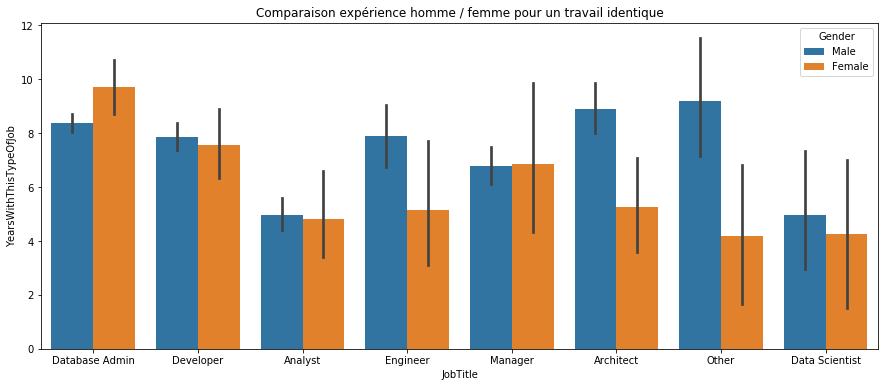

In [298]:
plt.figure(figsize=(15, 6))
plt.title("Comparaison expérience homme / femme pour un travail identique")
sns.barplot(x=g_df.JobTitle, y=g_df.YearsWithThisTypeOfJob, hue=g_df.Gender)

## Représentez une "heat-map" des Etats-Unis en fonction du salaire moyen

### Par ville : 


In [299]:
heat_town_dfk = dfk.groupby(dfk["Location"]).SalaryUSD.mean()
heat_town_dfk = heat_dfk.sort_values()

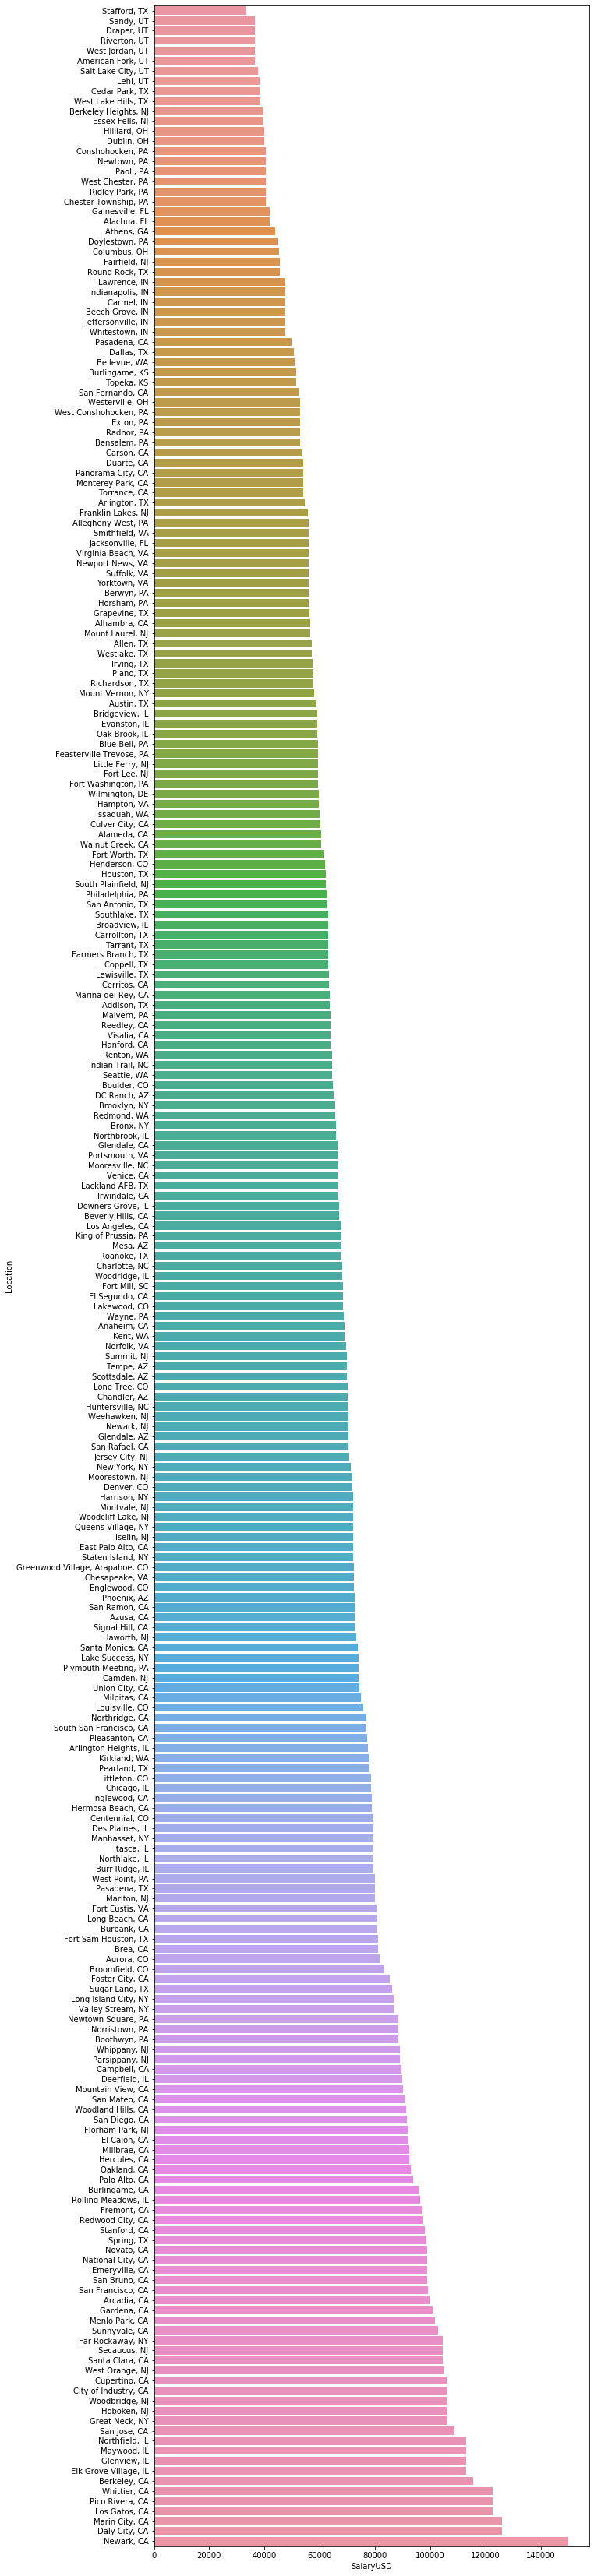

In [300]:
plt.figure(figsize=(10,60))
title = "Répartition des salaires selon la localisation"
sns.barplot(y=heat_town_dfk.index, x=heat_town_dfk)

### Par état : 

In [301]:
heat_state_dfk = dfk.groupby(dfk["State"]).SalaryUSD.mean()
heat_state_dfk = heat_state_dfk.sort_values()

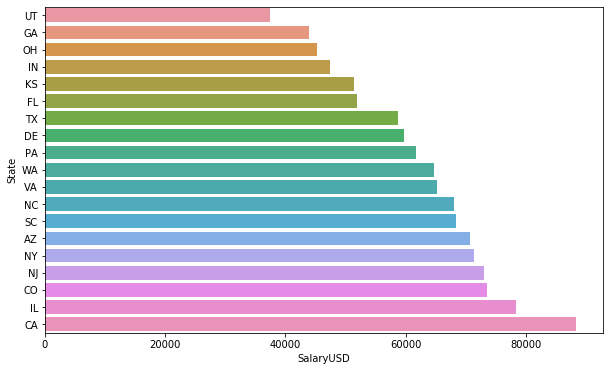

In [302]:
plt.figure(figsize=(10,6))
title = "Répartition des salaires selon la localisation"
sns.barplot(y=heat_state_dfk.index, x=heat_state_dfk)